# Uber Supply Demand Assignment

***Introduction***

Solving this assignment will give us an idea about how problems are systematically solved using Exploratory Data Analysis(EDA) and data visualisation.

***Business Understanding***

We all have used Uber or any other cab service for travel from the airport. Most of the time problem of **cancellation by the driver or non-availability of cars** faced by the customers.These issues also impact the business of Uber as Uber loses out on its revenue. As an analyst, we decide to address the problem Uber is facing - driver cancellation and non-availability of cars leading to loss of potential revenue.

***Business Objectives***

The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation. As a result of your analysis, you should be able to present to the client the root cause(s) and possible hypotheses of the problem(s) and recommend ways to improve them.

***Data Understanding***

There are six attributes associated with each request made by a customer:

   1. Request id: A unique identifier of the request
   2. Time of request: The date and time at which the customer made the trip request
   3. Drop-off time: The drop-off date and time, in case the trip was completed 
   4. Pick-up point: The point from which the request was made
   5. Driver id: The unique identification number of the driver
   6. Status of the request: The final status of the trip, that can be either completed, cancelled by the driver or no cars available

Note: For this assignment, only the trips to and from the airport are being considered.

# Let's Start

***Supress Warnings***

In [1]:
import warnings
warnings.filterwarnings('ignore')

***Importing required packages***

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Sourcing

***Importing the Data (CSV File) here***

In [3]:
uber = pd.read_csv("Uber Request Data.csv")
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


***Inspecting the Dataframe***

In [4]:
uber.shape

(6745, 6)

In [5]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [6]:
uber.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


# Checking the data quality issue & Data Cleaning

***Replacing space in column heading with "_"***

In [7]:
uber.columns = uber.columns.str.replace(' ', '_')
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


***Checking for any duplicate values in rows***

In [8]:
uber.duplicated(subset = 'Request_id', keep = False).sum()

0

No duplicate values found 

***Checking for any spelling mistakes in Pickup_point & Status Columns***

In [9]:
uber['Pickup_point'].unique()

array(['Airport', 'City'], dtype=object)

In [10]:
uber['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

No spelling mistake found

***Inspecting Null Values***

In [11]:
uber.isnull().sum()

Request_id              0
Pickup_point            0
Driver_id            2650
Status                  0
Request_timestamp       0
Drop_timestamp       3914
dtype: int64

In [12]:
uber[(uber['Driver_id'].isnull())].groupby('Status').size()

Status
No Cars Available    2650
dtype: int64

In [13]:
uber[(uber['Drop_timestamp'].isnull())].groupby('Status').size()

Status
Cancelled            1264
No Cars Available    2650
dtype: int64

**'Driver_id'** rows are empty when the **'Status'** is **"No Cars Available".**

**'Drop_timestamp'** rows are empty when the **'Status'** is **"No Cars Available" or "Cancelled"**.

Since the trips did not happen in those cases, the **'Driver_id'** and **'Drop_timestamp'** can not be available.

It looks valid to have **'Driver_id'** and **'Drop_timestamp'** to have null values. Hence these null values are retained as such in data.

# Data Preperation 

***Converting data type from 'Object' to 'Datetime'***

As we saw that 'Request_timestamp' and 'Drop_timestamp' is object type, converting both to datetime type by creating new columns.

In [14]:
uber['Request_Date_Time'] = pd.to_datetime(uber['Request_timestamp'], dayfirst = True)
uber['Drop_Date_Time'] = pd.to_datetime(uber['Drop_timestamp'], dayfirst = True)
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Date_Time,Drop_Date_Time
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47


***Checking if 'Request_timestamp' and 'Drop_timestamp' got converted to datetime type or not***

In [15]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request_id         6745 non-null   int64         
 1   Pickup_point       6745 non-null   object        
 2   Driver_id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request_timestamp  6745 non-null   object        
 5   Drop_timestamp     2831 non-null   object        
 6   Request_Date_Time  6745 non-null   datetime64[ns]
 7   Drop_Date_Time     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 421.7+ KB


Successfully created new columns with Datetime type.

***Dropping 'Request_timestamp' and 'Drop_timestamp' as it is not required further***

In [16]:
uber = uber.drop('Request_timestamp', axis = 1)
uber = uber.drop('Drop_timestamp', axis = 1)
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_Date_Time,Drop_Date_Time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


***Inspecting dataframe after the dropping columns***

In [17]:
uber.shape

(6745, 6)

In [18]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request_id         6745 non-null   int64         
 1   Pickup_point       6745 non-null   object        
 2   Driver_id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request_Date_Time  6745 non-null   datetime64[ns]
 5   Drop_Date_Time     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


***1) Handling 'Request_Date_Time' Column***

***Checking if there is any NA's coersed becaused of invalid values in Column***

In [19]:
uber['Request_Date_Time'].isna().sum()

0

***Extracting Date and Time from 'Request_Date_Time'***

In [20]:
uber['Request_Date'] = uber['Request_Date_Time'].dt.date
uber['Request_Time'] = uber['Request_Date_Time'].dt.time
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_Date_Time,Drop_Date_Time,Request_Date,Request_Time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16


***Extracting day of the week from 'Request_Date_Time'***

In [21]:
uber['Request_DayOfWeek'] = uber['Request_Date_Time'].dt.strftime("%A")
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_Date_Time,Drop_Date_Time,Request_Date,Request_Time,Request_DayOfWeek
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,Monday
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,Monday
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,Tuesday
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,Tuesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,Wednesday


***Extracting Hour from 'Request_Date_Time'***

In [22]:
uber['Request_Hours'] = uber['Request_Date_Time'].dt.hour
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_Date_Time,Drop_Date_Time,Request_Date,Request_Time,Request_DayOfWeek,Request_Hours
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,Monday,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,Monday,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,Tuesday,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,Tuesday,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,Wednesday,8


***Creating slots or bins of 'Request_Hours'***

In [23]:
uber.loc[uber['Request_Hours'].between(0, 2), 'Request_Timeslot'] = 'Late Night'
uber.loc[uber['Request_Hours'].between(3, 5,), 'Request_Timeslot'] = 'Early Morning'
uber.loc[uber['Request_Hours'].between(6, 11), 'Request_Timeslot'] = 'Morning'
uber.loc[uber['Request_Hours'].between(12, 15), 'Request_Timeslot'] = 'Afternoon'
uber.loc[uber['Request_Hours'].between(16, 19), 'Request_Timeslot'] = 'Evening'
uber.loc[uber['Request_Hours'].between(20, 24), 'Request_Timeslot'] = 'Night'
uber.head(50)

,Request_id,Pickup_point,Driver_id,Status,Request_Date_Time,Drop_Date_Time,Request_Date,Request_Time,Request_DayOfWeek,Request_Hours,Request_Timeslot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,Monday,11,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,Monday,17,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,Tuesday,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,Tuesday,21,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,Wednesday,8,Morning
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28,Wednesday,21,Night
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32,Thursday,6,Morning
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52,Friday,5,Early Morning
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,Friday,17,Evening
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11,06:46:00,Monday,6,Morning


***Checking if any new columns created has Na's***

In [24]:
uber.isna().sum()

Request_id              0
Pickup_point            0
Driver_id            2650
Status                  0
Request_Date_Time       0
Drop_Date_Time       3914
Request_Date            0
Request_Time            0
Request_DayOfWeek       0
Request_Hours           0
Request_Timeslot        0
dtype: int64

***2) Handling 'Drop_Date_Time' column***

***Exctracting Date & Time from 'Drop_Date_Time'***

In [25]:
uber['Drop_Date'] = uber['Drop_Date_Time'].dt.date
uber['Drop_Time'] = uber['Drop_Date_Time'].dt.time
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_Date_Time,Drop_Date_Time,Request_Date,Request_Time,Request_DayOfWeek,Request_Hours,Request_Timeslot,Drop_Date,Drop_Time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,Monday,11,Morning,2016-07-11,13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,Monday,17,Evening,2016-07-11,18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,Tuesday,9,Morning,2016-07-12,09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,Tuesday,21,Night,2016-07-12,22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,Wednesday,8,Morning,2016-07-13,09:25:47


# Exploratory Data Analysis (EDA)

***Looking for insights from 'Pickup_points'***

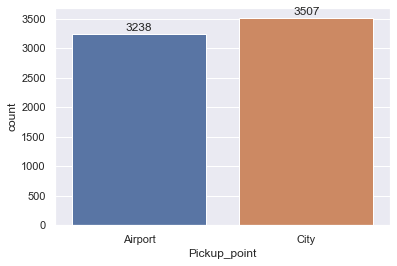

In [26]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Pickup_point", data=uber)
for p in ax.patches:
    value = p.get_height()
    X = p.get_x()+0.4
    Y = p.get_height()+50
    ax.text(X, Y, value, ha="center")
plt.show()

There is no much difference in 'City' and 'Airport' requests.

**Looking for insights from 'Status'**

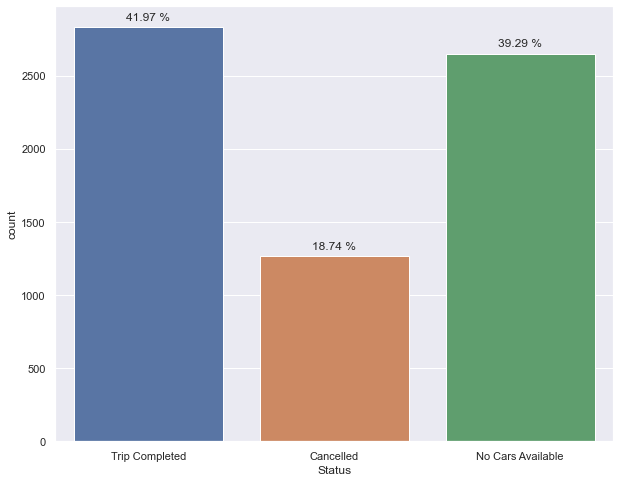

In [27]:
plt.figure(figsize=(10, 8))
ax =sns.countplot(x="Status", data=uber)
total = len(uber)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.4
    Y = p.get_height()+50
    ax.text(X, Y, '{:} %'.format(value), ha="center")
plt.show()

Only 41.97% requests from city and airport request gets completed.

**looking to find the request count vs daysof week**

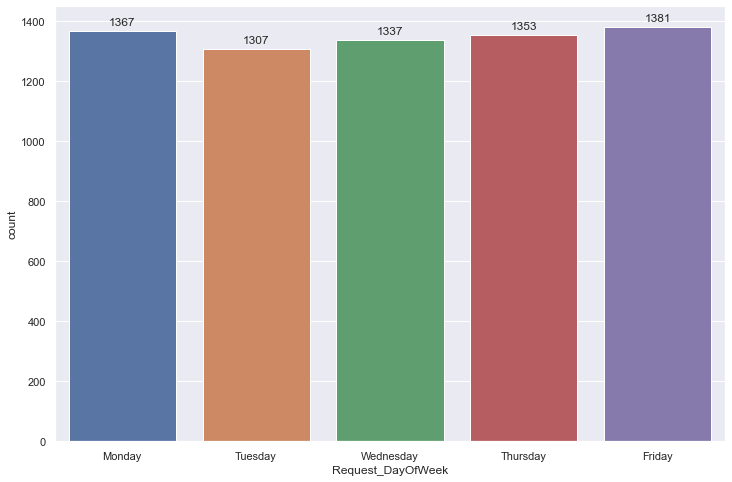

In [28]:
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='Request_DayOfWeek', data=uber)
for p in ax.patches:
    value = p.get_height()
    X = p.get_x()+0.4
    Y = p.get_height()+20
    ax.text(X, Y, value, ha="center")
plt.show()

There isn't much difference in requests vs days of the week.

**looking for insight in request hour**

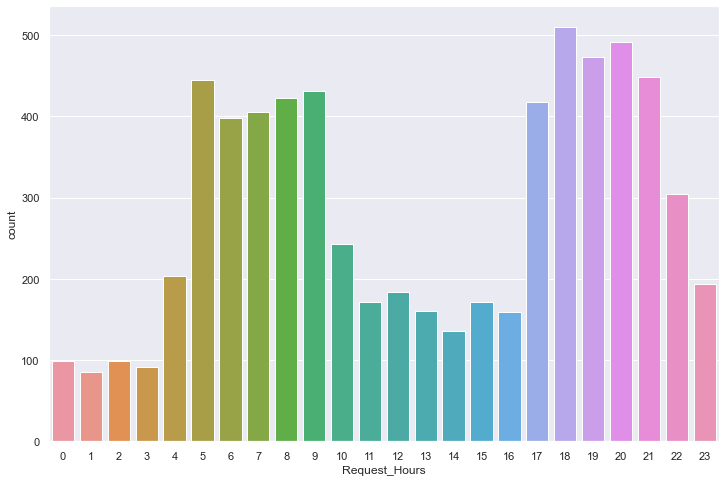

In [29]:
plt.figure(figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(x='Request_Hours', data=uber)
plt.show()

The above plot clearly depicts that there are high request rates from 5AM to 9AM and 5PM to 10PM.

**To check if high request rates from 5AM to 9AM and 5PM to 10PM is consistent throughout all days**

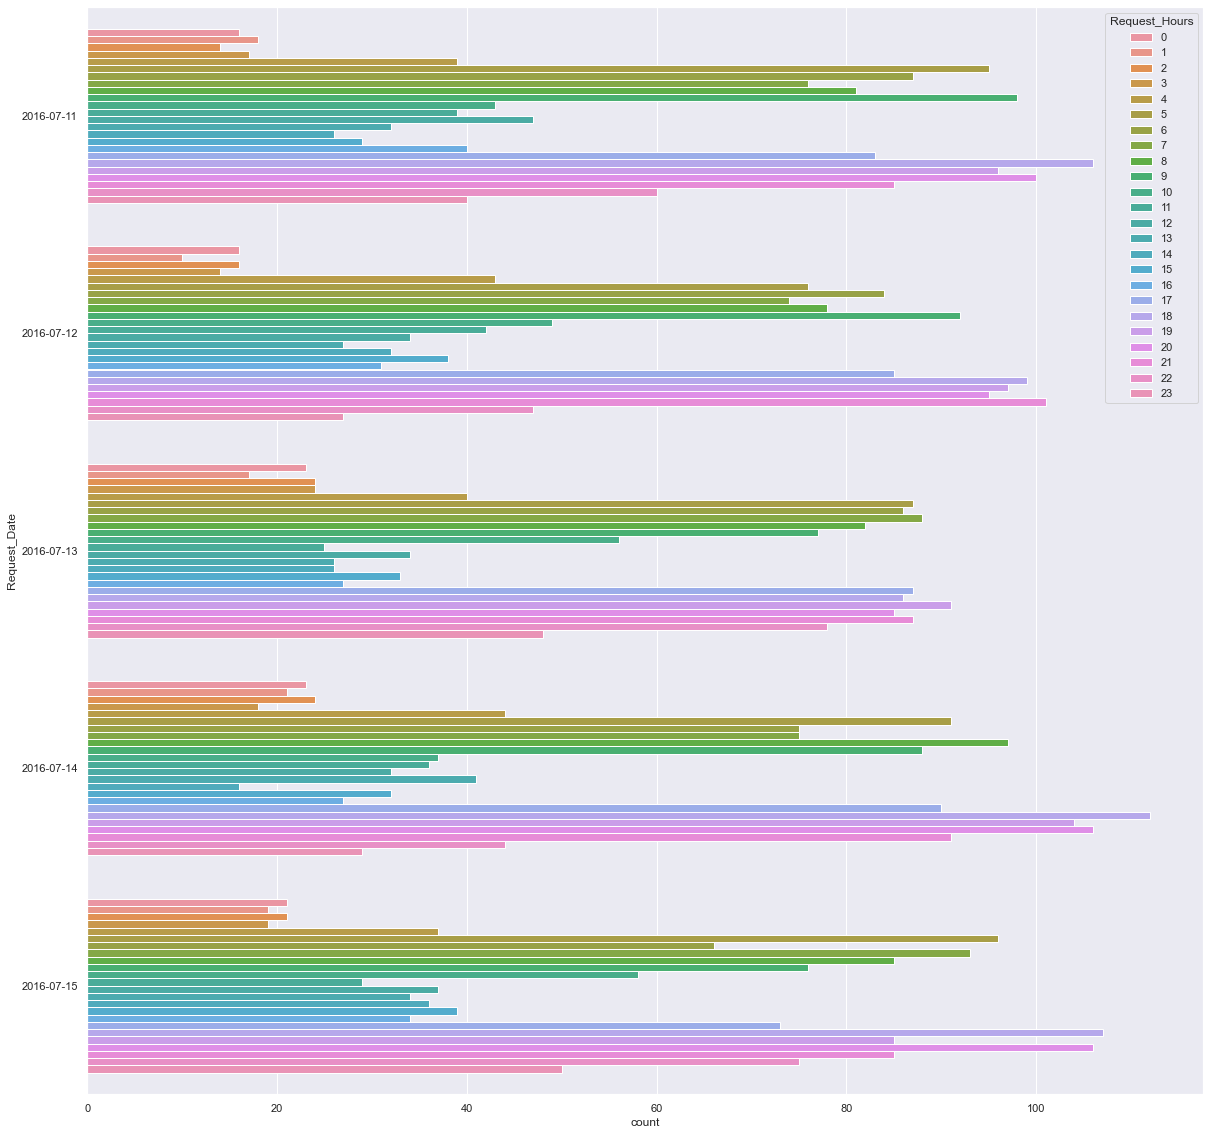

In [30]:
plt.figure(num=None, figsize=(20, 20), facecolor='w', edgecolor='b')
sns.countplot(y='Request_Date',hue="Request_Hours", data=uber)
plt.show()

Above graph shows that all dates high request rates is around the same time 5AM to 9AM and 5PM to 10PM.

**looking for insight in 'Request_timeslot'**

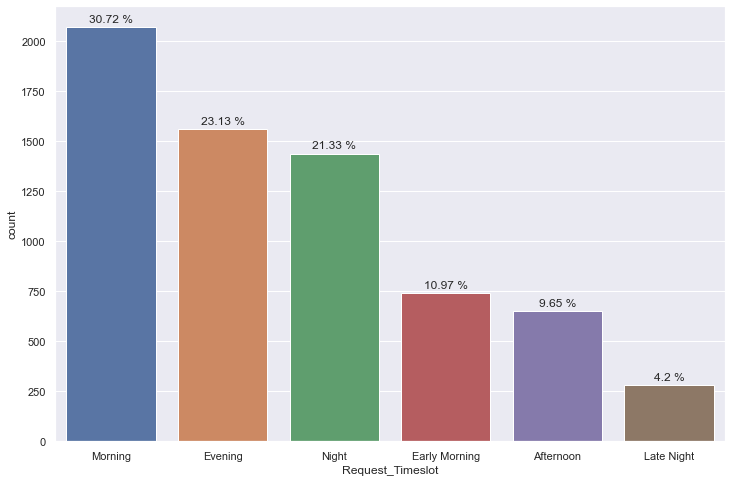

In [31]:
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='b')
ax =sns.countplot(x='Request_Timeslot', data=uber)
total = len(uber)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.4
    Y = p.get_height()+25
    ax.text(X, Y, '{:} %'.format(value), ha="center")
plt.show()

From the above plot it is clear that most of the requests are raised in Morning(30.72%), Evening(23.13%) and Night (21.33%) slots which is approx. high request rates are from 5AM to 9AM and 5PM to 10PM.

**Observations so far:**

    1. 1Only 41.97% requests from city and airport request gets completed
    2. High request rates are from Morning, Evening and Night slot

# **Segmenting the data**

**Segmenting pickup point over status**

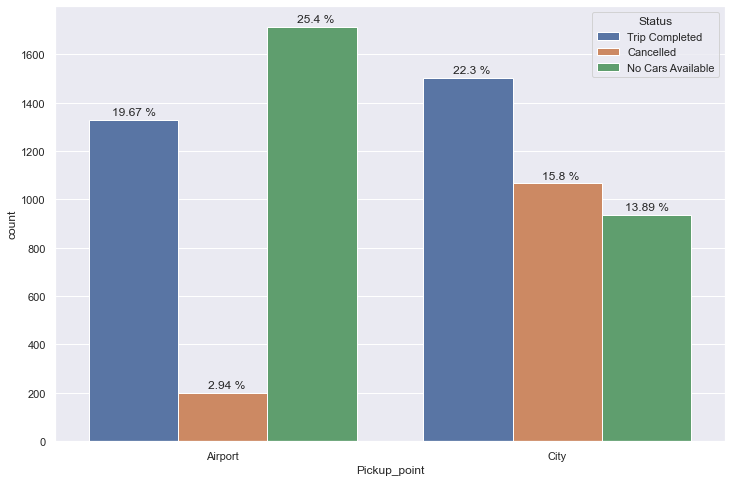

In [32]:
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='Pickup_point', hue="Status", data=uber)
total = len(uber)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.2
    Y = p.get_height()+20
    ax.text(X, Y, '{:} %'.format(value), ha="right")
plt.show()

The above plot shows that for most of the  Airport pickup requests there are no cars available and most requests that get cancelled are from city pickup requests

**Segmenting pickup point over time slot**

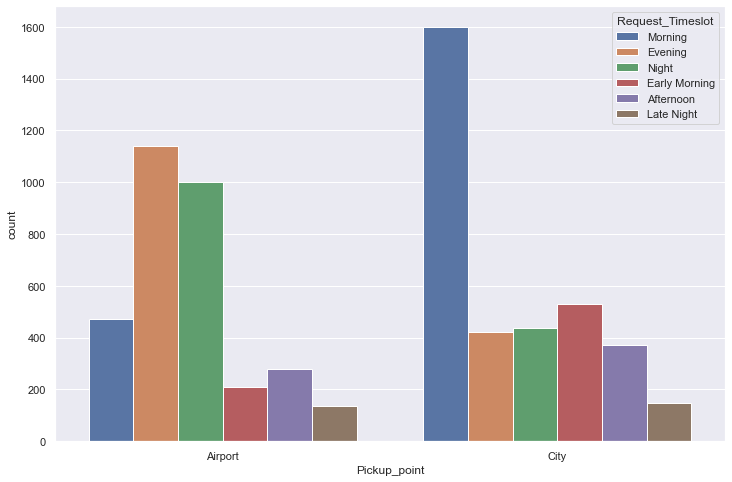

In [33]:
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(x='Pickup_point', hue="Request_Timeslot", data=uber)
plt.show()

Airport - has the hightest request in the evening & Night.

City- has the hightest request in the Morning.

From this graph our previous observation of high request rates of Morning, Evening & Night slot gets clarified.

**Segmenting the timeslot vs both Status and pickup point**

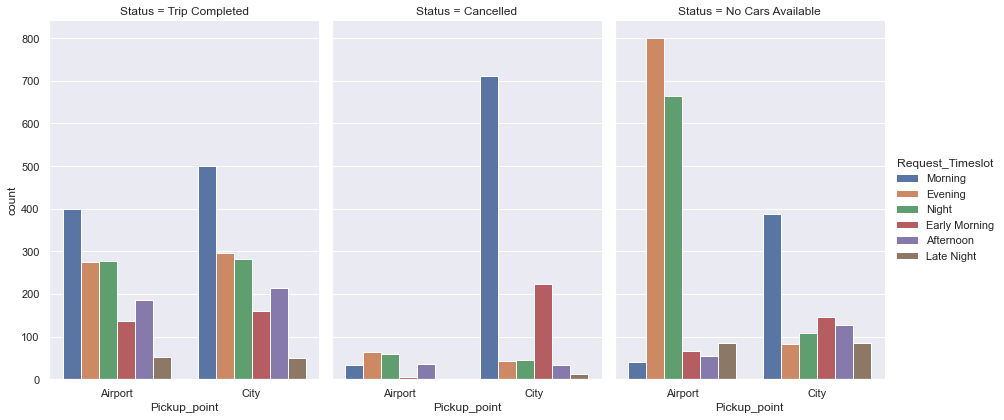

In [34]:
sns.catplot(x='Pickup_point',col="Status", hue = 'Request_Timeslot',data=uber ,kind="count",
            height=6,aspect= 0.7,ci=85,col_wrap=3,margin_titles=True)
plt.show()

From the above plot it is evident that:

    1. Airport requests during the Evening & Night slot(during which there is high airport request rate)there are no cars available
    
    2. Most City requests get cancelled in the Morning slot(during which there is high city request rate)

# Observation so far:

**The problematic status are cancelled and no cars available as it leads to potential loss of revenue.**

    1. Airport pickup point has most 'No Cars Available'
    2. City pickup point has highest 'Cancelled' status
    3. 'Airport' - has the hightest request in the 'Evening & Night' aligning to our 'No Cars Available' status
    4. 'City'- has the hightest request in the 'Morning' aligning to our 'Cancelled' status.


# Supply and demand gap calculation

**Creating demand column**

In [35]:
uber.loc[(uber.Status == 'Trip Completed') | (uber.Status == 'Cancelled')| (uber.Status == 'No Cars Available'), 'demand'] = 'Demand' 

**Creating supply column**

In [36]:
uber.loc[(uber.Status == 'Trip Completed'), 'supply'] = 'Supply'

**Creating gap column**

In [37]:
uber.loc[(uber.Status == 'Cancelled')| (uber.Status == 'No Cars Available'), 'gap'] = 'Gap' 

In [38]:
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_Date_Time,Drop_Date_Time,Request_Date,Request_Time,Request_DayOfWeek,Request_Hours,Request_Timeslot,Drop_Date,Drop_Time,demand,supply,gap
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,Monday,11,Morning,2016-07-11,13:00:00,Demand,Supply,NaN
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,Monday,17,Evening,2016-07-11,18:47:00,Demand,Supply,NaN
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,Tuesday,9,Morning,2016-07-12,09:58:00,Demand,Supply,NaN
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,Tuesday,21,Night,2016-07-12,22:03:00,Demand,Supply,NaN
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,Wednesday,8,Morning,2016-07-13,09:25:47,Demand,Supply,NaN


**Calculating demand, supply and gap count**

In [39]:
uber['demand'].count()

6745

In [40]:
uber['supply'].count()

2831

In [41]:
uber['gap'].count()

3914

In [42]:
uber_SupplyandDemand = pd.DataFrame([uber.demand,uber.supply,uber.gap]).transpose()
uber_SupplyandDemand.head()

,demand,supply,gap
0,Demand,Supply,NaN
1,Demand,Supply,NaN
2,Demand,Supply,NaN
3,Demand,Supply,NaN
4,Demand,Supply,NaN


**Plotting demand, supply and gap count**

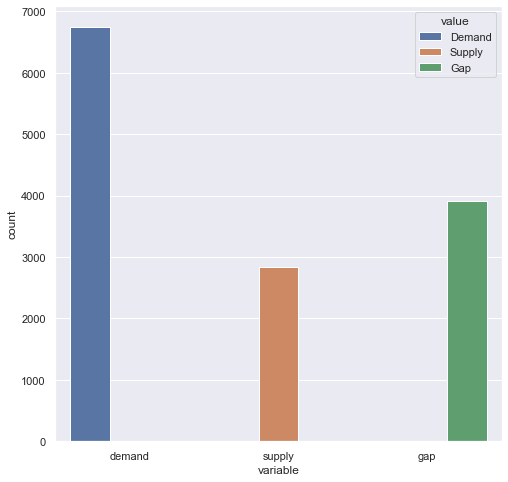

In [43]:
plt.figure(num=None, figsize=(8, 8), facecolor='w', edgecolor='k')
sns.countplot(x="variable",hue="value", data=pd.melt(uber_SupplyandDemand))
plt.show()

This clearly shows that gap exist and there is huge possible to bridge the gap and increase the revenue.

Gap = Demand -Supply

Around 58.02% of 'Gap' exist.

**Segmenting demand across the request time slot**

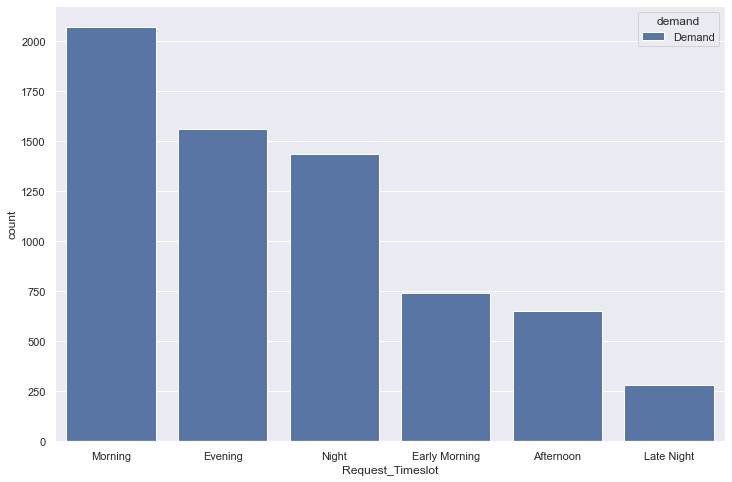

In [44]:
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(hue='demand',x="Request_Timeslot", data=uber)
plt.show()

Above graph shows that Morning, Evening and Night has the hightest demand for cabs

**Segmenting gap across the request time slot**

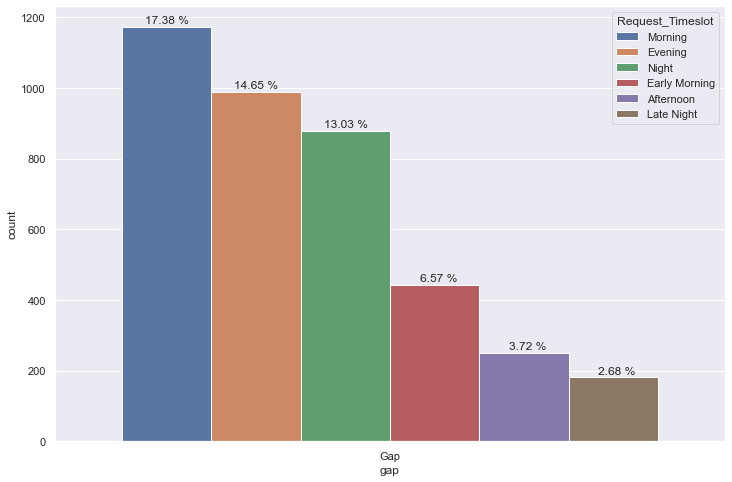

In [45]:
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='gap',hue="Request_Timeslot", data=uber)
total = len(uber['gap'])
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.1
    Y = p.get_height()+10
    ax.text(X, Y, '{:} %'.format(value), ha="right")
plt.show()

In the above graph - the percentage is taken only across the total gap percentage which is 58.02%

From the total gap percentage(58.02%) -around 17% gap exist during morning, 15% during evenings and 13% during night.

This shows that gap is mainly in the morning, evening and night time slot, which again is in sync with all our above findings.

**Segmenting gap across the status and request timeslot**

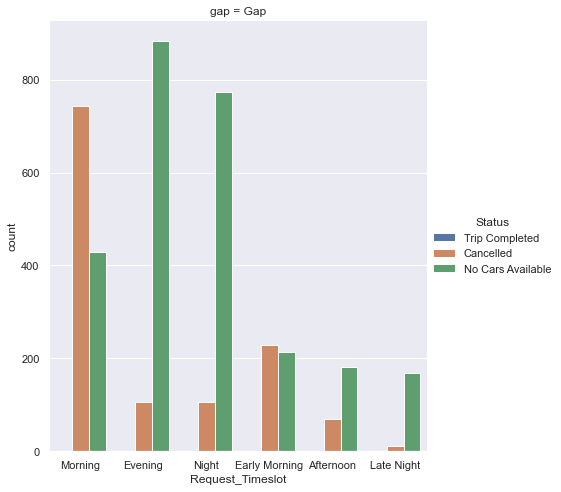

In [46]:
sns.catplot(x='Request_Timeslot',col="gap", hue = 'Status',data=uber ,kind="count", height=7,aspect= 0.9,ci=85)
plt.show()

As gap is sum of (cancelled + No cars available) : We can see that there is no plot in trip completed(Obvious).
    
Highest 'Cancelled' gap comes from Morning slot.

Highest 'No Cars Available' gap comes from Evening and Night slot.

**Segmenting gap across the pickup point and request timeslot**

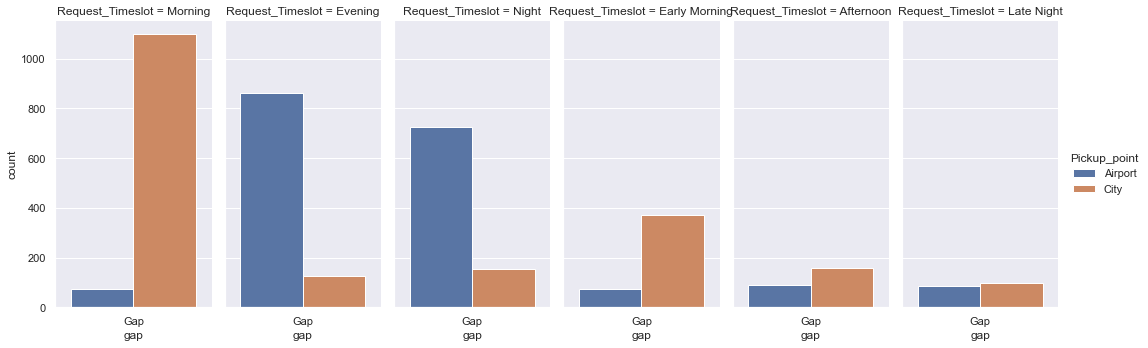

In [47]:
sns.catplot(x='gap',col="Request_Timeslot", hue = 'Pickup_point',data=uber ,kind="count", height=5,aspect= 0.5,
            ci=85)
plt.show()

The graph above shows that:

    1. In the morning, City pickup has the highest gap
    2. In the evening and night, Airport pickup has the highest gap

**Segmenting the gap across the request hour and pickup point**

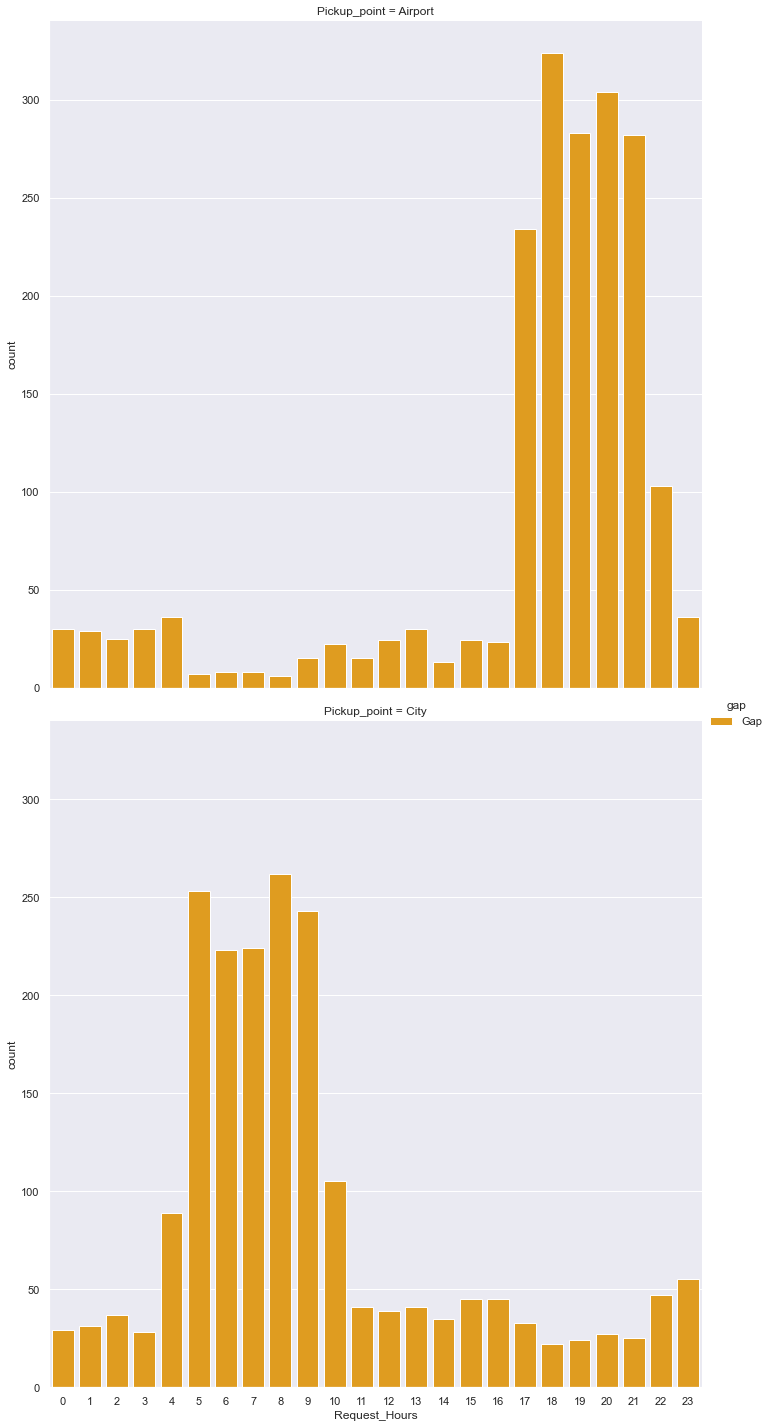

In [48]:
sns.catplot(x='Request_Hours',col="Pickup_point", hue = 'gap',data=uber ,kind="count", height=10,aspect= 1,
            ci=85,col_wrap=1,palette=sns.color_palette(['orange']))
plt.show()

The graph belows shows that:
    
    1. Airport has hightest gap at 17-21PM hours which is evening and night hours
    2. City has hightest gap at 5-9AM hours which is morning hours and vice versa is not true

# Observation so far:

The problematic status are 'cancelled' and 'no cars available' as it leads to potential loss of revenue. We observed the hightest value of:

    Status: "No Cars Available"
    Where is it happening: Airport - i.e Airport to City
    When is it happening: Evening and Night

    Status: "Cancelled"
    Where is it happening: City - i.e City to Airport
    When is it happening: Morning

The above points are in sync with highest request rates coming from morning and evening slot.

To make our analayse our observation so far, we further looked into the 'gap'. This again is in sync with above observations. The 'gap' which exists are the hightest:

    Status: "No Cars available"
    Where is it happening: Airport - i.e Airport to City
    When is it happening: Evening and Night

    Status: "Cancelled"
    Where is it happening: City - i.e City to Airport
    When is it happening: Morning

And vice versa is not true:

   1. Morning hours :There is no high demand for cabs from airport to city 
   2. Evening and Night hours: There is no high demand for cabs from city to airport

This tells us that there are more outbound flights in the morning and inbound flights in the evening.

# The reason for the issue:

**In the morning hours:** 

    Though there is high demand for cabs from City to Airport, the vice versa is not true.
    Hence the driver tends to 'Cancel' the request as getting a return trip from airport to city would be tough.

**In the Evening and Night hours:**

    Though there is high demand for cabs from Airport to City, the vice versa is not true.
    Hence 'No Cars Available' in the airport is the highest in the Evening and Night.

# Possible suggestions to fill the supply demand gap:

1. Provide incentives for airport trips during peak time.
2. Assigning few extra cabs specially to the airport trips.
3. Fixing a base price for drivers idle time in the airport or to come back to the city without any passenger.
4. Impose penalty for cancellation of requests by the drivers. Set a threshold for the maximum cancellation per day.
5. Promote continuous trip to airport with incentives.
6. Promote advance booking to airports and at the same time keeping drivers updated will the flight schedule with help them plan their work and they can accept the request as per their work plan.
7. Identifying the day and time wise High demand areas by fetching uber app users data and sharing same with drivers to avoid "No Cars Available" issue.